In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats as sts

1. Загрузить данные из файла “insurance.csv”.
2. С помощью метода describe() посмотреть статистику по данным.
Сделать выводы.

In [16]:
data = pd.read_csv('./insurance.csv', sep=',')
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Построить гистограммы для числовых показателей. Сделать выводы.

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

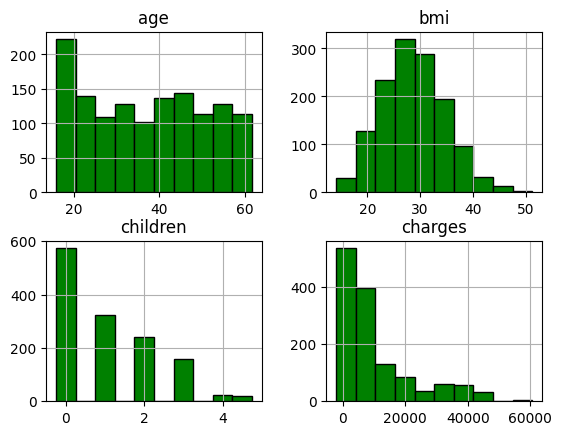

In [3]:

data.hist(color = 'green', edgecolor = 'black', align="left")


4. Найти меры центральной тенденции и меры разброса для индекса массы
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и
на гистограммах (3 вертикальные линии). Добавить легенду на графики.
Сделать выводы.

BMI 
среднее: 30.66, мода: 32.3, медиана: 30.4


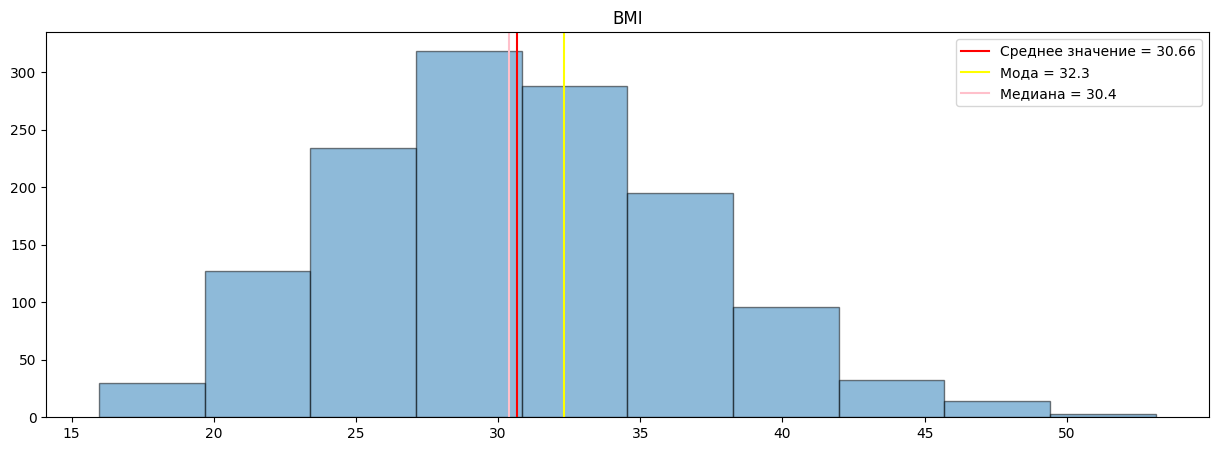

In [4]:
bmi_mean = np.mean(data['bmi']).round(2)
bmi_moda = data['bmi'].mode().values[0]
bmi_med = np.median(data['bmi'])

charges_mean = np.mean(data['charges']).round(2)
charges_moda = data['charges'].values[0]
charges_med = np.median(data['charges'])

print(f'BMI \nсреднее: {bmi_mean}, мода: {bmi_moda}, медиана: {bmi_med}')

plt.figure(figsize=(15, 5))
values, bins, bars = plt.hist(data['bmi'], edgecolor='black', alpha=0.5)
plt.title('BMI')
plt.axvline(x = bmi_mean, color = 'red', label = f'Среднее значение = {bmi_mean}')
plt.axvline(x = bmi_moda, color = 'yellow', label = f'Мода = {bmi_moda}')
plt.axvline(x = bmi_med, color = 'pink', label = f'Медиана = {bmi_med}')
plt.legend()
plt.show()




Charges
среднее: 13270.42, мода: 16884.924, медиана: 9382.033


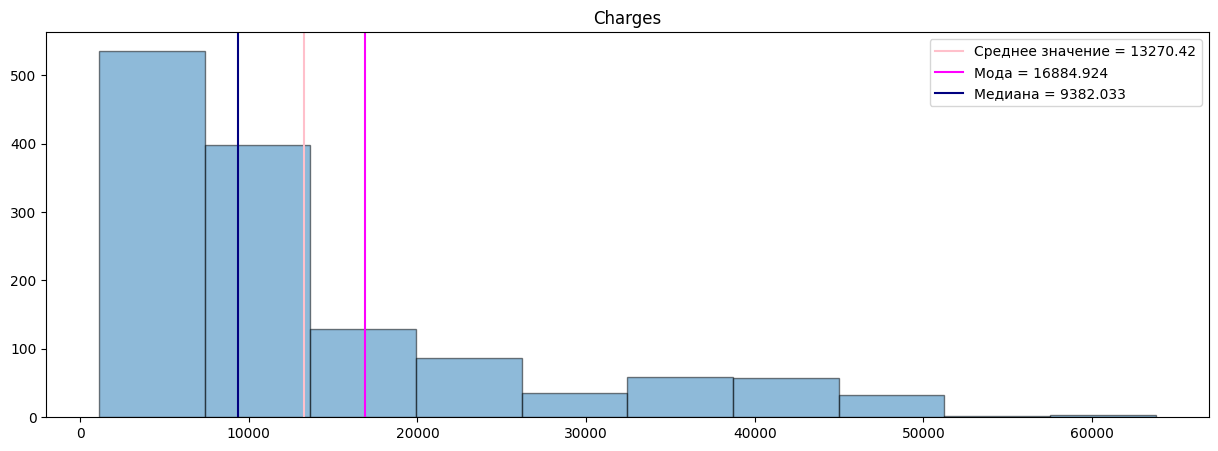

In [5]:
print(
    f'Charges\nсреднее: {charges_mean}, мода: {charges_moda}, медиана: {charges_med}'
)
plt.figure(figsize=(15, 5))
values, bins, bars = plt.hist(data['charges'], edgecolor='black',alpha=0.5)
plt.title('Charges')
plt.axvline(x = charges_mean, color = 'pink', label = f'Среднее значение = {charges_mean}')
plt.axvline(x = charges_moda, color = 'magenta', label = f'Мода = {charges_moda}')
plt.axvline(x = charges_med, color = 'navy', label = f'Медиана = {charges_med}')
plt.legend()
plt.show()

5. Построить box-plot для числовых показателей. Названия графиков
должны соответствовать названиям признаков. Сделать выводы.

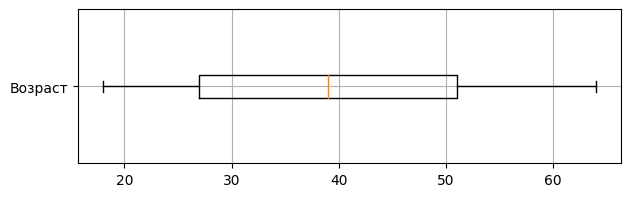

In [6]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['age']], labels = ['Возраст'], vert = False)
plt.grid()
plt.show()

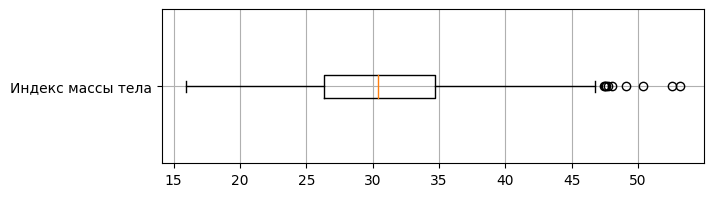

In [7]:

plt.figure(figsize=(7, 2))
plt.boxplot([data['bmi']], labels = ['Индекс массы тела'], vert = False)
plt.grid()
plt.show()

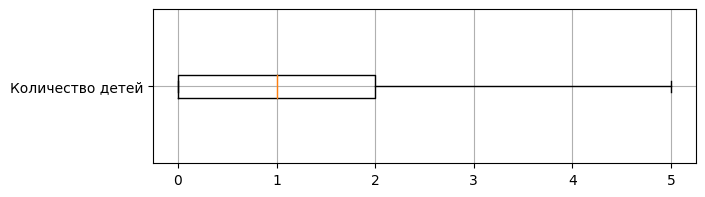

In [8]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['children']], labels = ['Количество детей'], vert = False)
plt.grid()
plt.show()

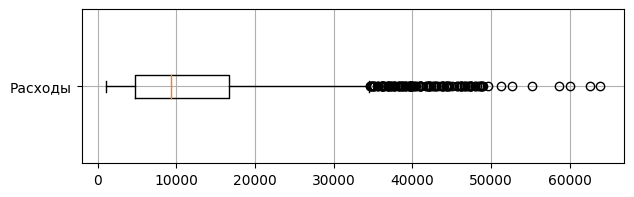

In [9]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['charges']], labels = ['Расходы'], vert = False)
plt.grid()
plt.show()

6. Используя признак charges или imb, проверить, выполняется ли
центральная предельная теорема. Использовать различные длины
выборок n. Количество выборок = 300. Вывести результат в виде
гистограмм. Найти стандартное отклонение и среднее для полученных
распределений. Сделать выводы

<Figure size 1800x500 with 0 Axes>

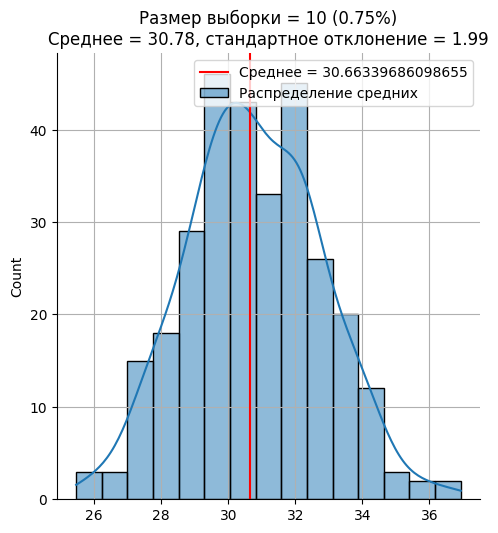

<Figure size 1800x500 with 0 Axes>

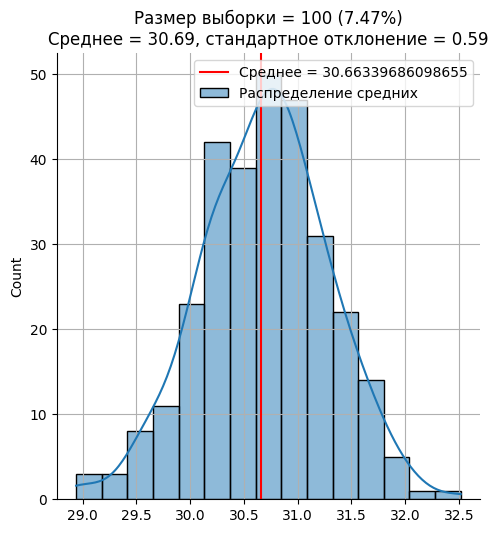

<Figure size 1800x500 with 0 Axes>

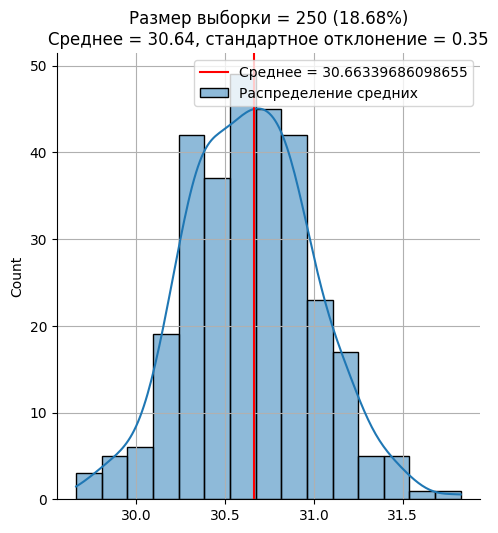

<Figure size 1800x500 with 0 Axes>

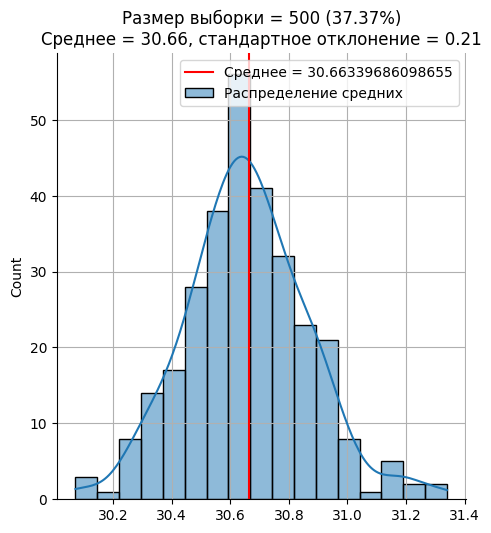

<Figure size 1800x500 with 0 Axes>

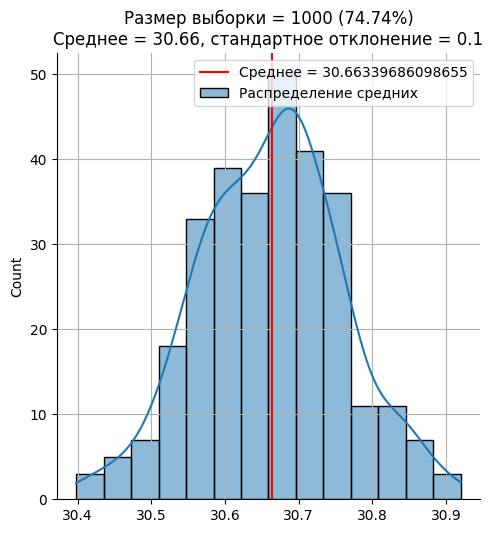

In [10]:
number_of_samples = 300

def plot_clt(df, n, column) -> None:
    for sample_size in n:
        means_list = list()
        for i in np.arange(number_of_samples):
            means_list.append(df[column].sample(sample_size).mean())
        
        mean = np.mean(means_list)
        std = np.std(means_list)

        plt.figure(figsize = (18, 5))
        sns.displot(means_list, label="Распределение средних", kde=True)
        plt.axvline(df[column].mean(), label = f'Среднее = {df[column].mean()}', color = 'red')
        plt.grid(True)
        plt.title(f'Размер выборки = {sample_size} ({round(100 * sample_size / len(df), 2)}%)\n' +
                  f'Среднее = {round(mean, 2)}, стандартное отклонение = {round(std, 2)}')
        plt.legend(loc = "upper right")
        plt.show()



plot_clt(data, [10, 100, 250, 500, 1000], "bmi")

Построить 95% и 99% доверительный интервал для среднего значения
расходов и среднего значения индекса массы тела.

In [11]:
def print_mean_trust_interval(values, trust_level):
    trust = {
        0.95: 1.96,
        0.99: 2.58,
    }
    print(f"Доверительный интервал, основанный на нормальном распределении, для столбца {values.name} с коэффициентом доверия {trust_level}:")
    se = values.std() / np.sqrt(len(values))
    mean = values.mean()
    print(
        f'[{(mean - trust[trust_level] * se).round(2)},{(mean + trust[trust_level] * se).round(2)}]'
    )
    print('-'*100)

print_mean_trust_interval(data["charges"], 0.95)
print_mean_trust_interval(data["charges"], 0.99)
print_mean_trust_interval(data["bmi"], 0.95)
print_mean_trust_interval(data["bmi"], 0.99)


Доверительный интервал, основанный на нормальном распределении, для столбца charges с коэффициентом доверия 0.95:
[12621.53,13919.31]
----------------------------------------------------------------------------------------------------
Доверительный интервал, основанный на нормальном распределении, для столбца charges с коэффициентом доверия 0.99:
[12416.27,14124.58]
----------------------------------------------------------------------------------------------------
Доверительный интервал, основанный на нормальном распределении, для столбца bmi с коэффициентом доверия 0.95:
[30.34,30.99]
----------------------------------------------------------------------------------------------------
Доверительный интервал, основанный на нормальном распределении, для столбца bmi с коэффициентом доверия 0.99:
[30.23,31.09]
----------------------------------------------------------------------------------------------------


8. Проверить распределения следующих признаков на нормальность:
индекс массы тела, расходы. Сформулировать нулевую и
альтернативную гипотезы. Для каждого признака использовать KS-тест
и q-q plot. Сделать выводы на основе полученных p-значений.

### H0: Данные соответсвуют нормальному распределению  
### H1: Данные не соответсвуют нормальному распределению

Проверка нормальности распределения признака bmi
----------------------------------------------------------------------------------------------------
Проверка с помощью Q-Q plot


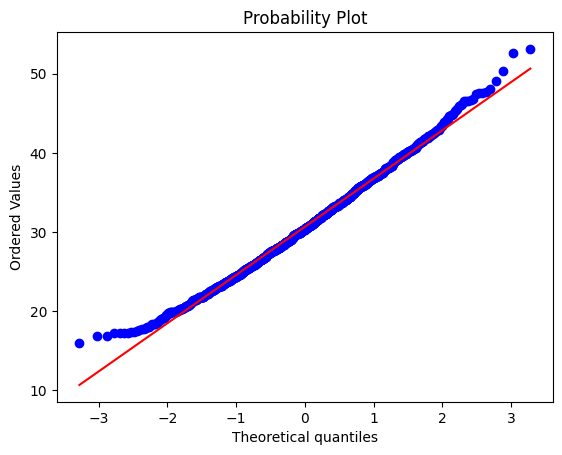

----------------------------------------------------------------------------------------------------
Проверка с помощью KS-теста
p-value = 0.0
----------------------------------------------------------------------------------------------------

Проверка нормальности распределения признака charges
----------------------------------------------------------------------------------------------------
Проверка с помощью Q-Q plot


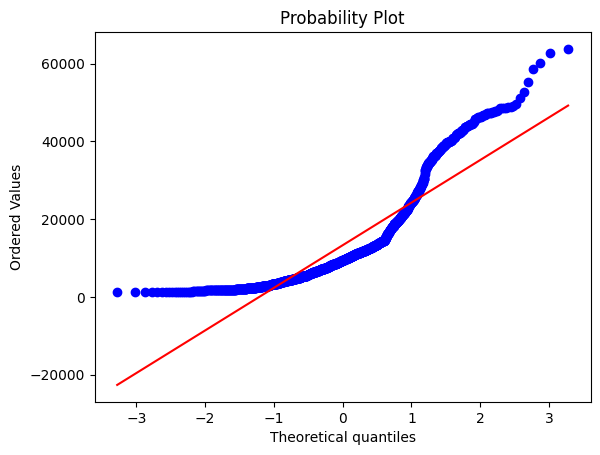

----------------------------------------------------------------------------------------------------
Проверка с помощью KS-теста
p-value = 0.0
----------------------------------------------------------------------------------------------------



In [15]:


def check_normality(df, column):
    print(f'Проверка нормальности распределения признака {column}')
    print('-'*100)
    print('Проверка с помощью Q-Q plot')
    sts.probplot(df[column], dist="norm", plot=plt)
    plt.show()
    print('-'*100)
    print('Проверка с помощью KS-теста')
    print(f'p-value = {sts.kstest(df[column], "norm")[1]}')
    print('-'*100)
    print()

check_normality(data, 'bmi')
check_normality(data, 'charges')
